In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df1 = pd.read_csv(r'/Users/mattmeredith/Downloads/prices_clean.csv')
df1.shape

(1170, 4)

In [3]:
df1.isnull().sum()

year     0
make     0
model    0
price    0
dtype: int64

In [4]:
df1['price'].describe().apply("{0:.5f}".format)

count       1170.00000
mean      154572.41709
std       435179.91379
min         7300.00000
25%        38900.00000
50%        53770.00000
75%        95175.00000
max      5000000.00000
Name: price, dtype: object

In [5]:
outlier = df1[df1['price'] >= 300000] 
outlier.shape

(105, 4)

In [6]:
df1 = df1.drop_duplicates() # 3 out
df_clean = df1[df1['price'] < 300000]# removing price outliers
df_clean.shape

(1063, 4)

In [7]:
minprice, maxprice = df_clean['price'].min(), df_clean['price'].max()
gap = maxprice - minprice
bins = 28
width = math.ceil(gap/bins)
width

10425

In [8]:
df_clean.sort_values(by ='price', ascending = True)

,year,make,model,price
89,2023,Hyundai,Exter,7300.0
88,2023,Hyundai,Exter SUV,7300.0
114,2023,Hyundai,Grand i10 Nios Era,8150.0
115,2023,Hyundai,Aura E,9240.0
110,2023,Hyundai,Verna E 1.5 VTVT,11700.0
...,...,...,...,...
750,2023,Aston Martin,DB11 V8,295600.0
843,2023,Bentley,Flying Spur Hybrid Mulliner,297400.0
737,2023,Aston Martin,V12 Vantage Coupe,298200.0
742,2023,Aston Martin,V12 Vantage,298200.0


In [9]:
bins = np.arange(minprice, maxprice+width, width)
bins
   

array([  7300.,  17725.,  28150.,  38575.,  49000.,  59425.,  69850.,
        80275.,  90700., 101125., 111550., 121975., 132400., 142825.,
       153250., 163675., 174100., 184525., 194950., 205375., 215800.,
       226225., 236650., 247075., 257500., 267925., 278350., 288775.,
       299200.])

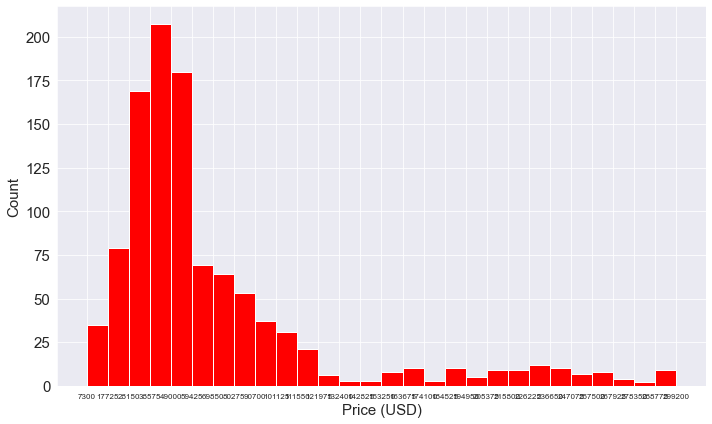

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.hist(x=df_clean['price'], bins=bins, color='red')

fig.set_size_inches(10, 6)
ax.set_xlabel('Price (USD)', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
plt.xticks(bins, fontsize=8)
plt.yticks(fontsize=15)
fig.tight_layout()
plt.show()


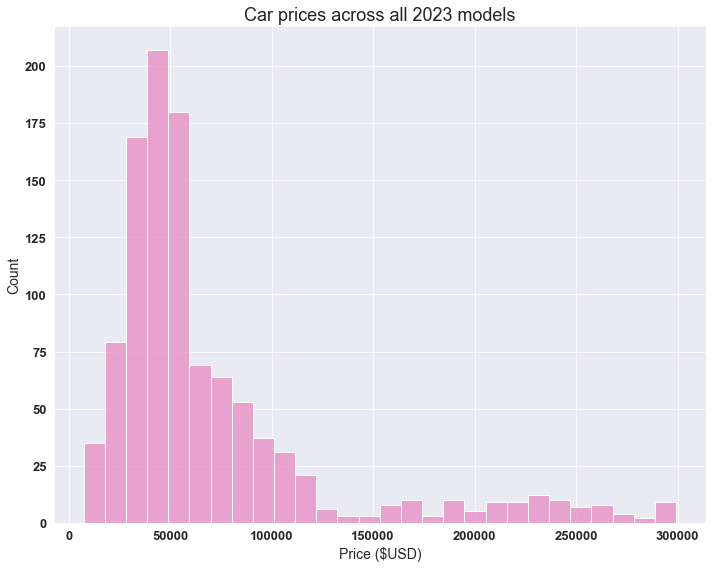

In [11]:
# revisualise the histogram cleanly with Seaborn
sns.set_style('darkgrid')
plt.figure(figsize=(10,8), tight_layout=True)
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
plt.rc('font', weight=600)


sns.histplot(data=df_clean, x='price', bins=bins, color=sns.color_palette('Set2')[3], linewidth=1).set(title='Car prices across all 2023 models', xlabel='Price ($USD)')
plt.show()

In [12]:
# new dataframe with price cutoff where the normal distribution roughly ends
df_distr = df_clean[df_clean['price'] <= 127000] 
minprice, maxprice = df_distr['price'].min(), df_distr['price'].max()
# rounder bins, instead of calculating bin sizes based on an average step
width = 10000 
bins = np.arange(7000, maxprice + width, width)
bins

array([  7000.,  17000.,  27000.,  37000.,  47000.,  57000.,  67000.,
        77000.,  87000.,  97000., 107000., 117000., 127000.])

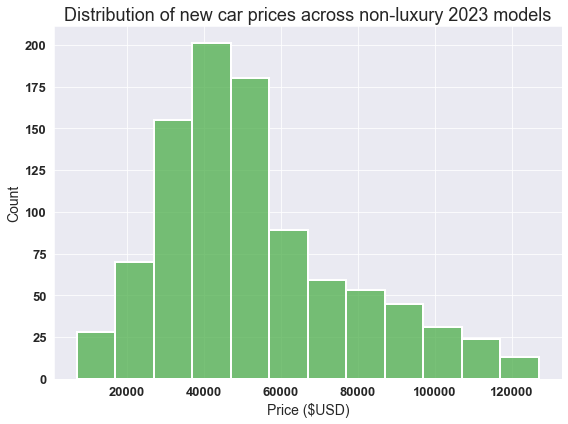

In [13]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,6), tight_layout=True)
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
plt.rc('font', weight=600)



sns.histplot(data=df_distr, x='price', bins=bins, color=sns.color_palette('Set1')[2], linewidth=2).set(title='Distribution of new car prices across non-luxury 2023 models', xlabel='Price ($USD)')
plt.show()

In [14]:
df_distr['price'].median()

48145.0

In [15]:
df_distr['price'].describe()
# one can intuit the average from the above, just to verify we see the average new car is between 48-53k this year
# but what do the y-values mean in the context of 948 total new cars?

count       948.000000
mean      53002.473629
std       24237.659353
min        7300.000000
25%       35750.000000
50%       48145.000000
75%       64125.000000
max      126290.000000
Name: price, dtype: float64

/Users/mattmeredith/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:407: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  and estimate_kws["bins"] == "auto"


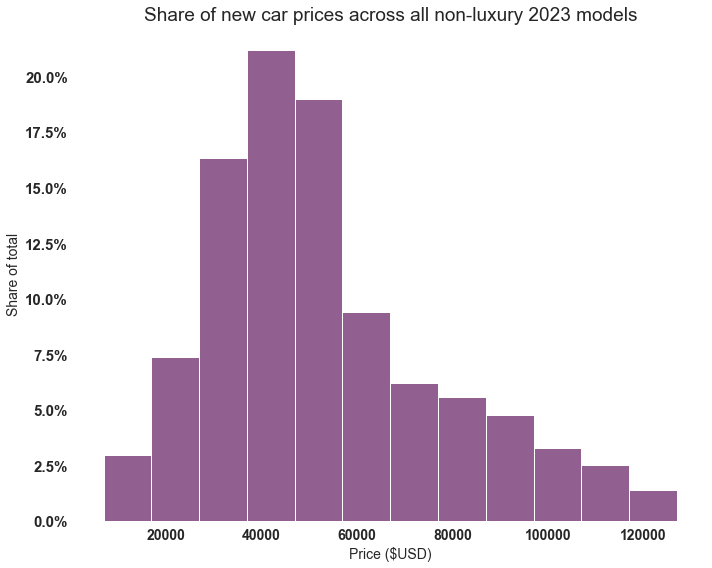

In [16]:
#instead of a raw count (which may be a little uncommunicative at a glance), we can reset the y-axis weighted as a % of total count
from matplotlib.ticker import PercentFormatter

data = df_distr['price']

sns.set_style('darkgrid')
sns.set_style(rc = {'axes.facecolor': 'white'})
plt.figure(figsize=(10,8), tight_layout=True)
plt.rc('axes', titlesize=19)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=15)
plt.rc('font', weight=700)



sns.histplot(data=data, x=df_distr['price'], weights=np.ones(len(df_distr)) / len(df_distr), 
             bins=bins, color=sns.color_palette("flare")[5], linewidth=1).set(title='Share of new car prices across all non-luxury 2023 models', 
                                                                         xlabel='Price ($USD)', ylabel="Share of total")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig("car_models_23.jpg", dpi=300)
